In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
sns.set_palette('hls')
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv('kyphosis.csv')

In [4]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [5]:
df.isnull().sum().sum()

0

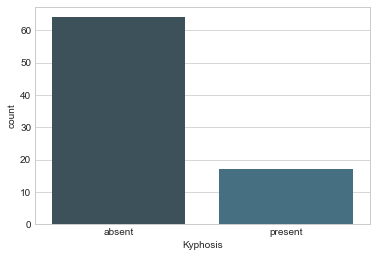

In [6]:
sns.countplot(df['Kyphosis'])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


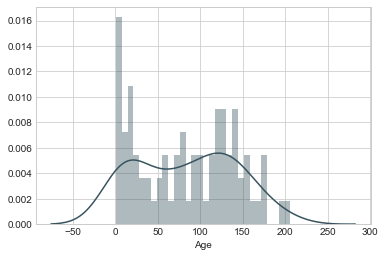

In [8]:
sns.distplot(df['Age'], bins=30)

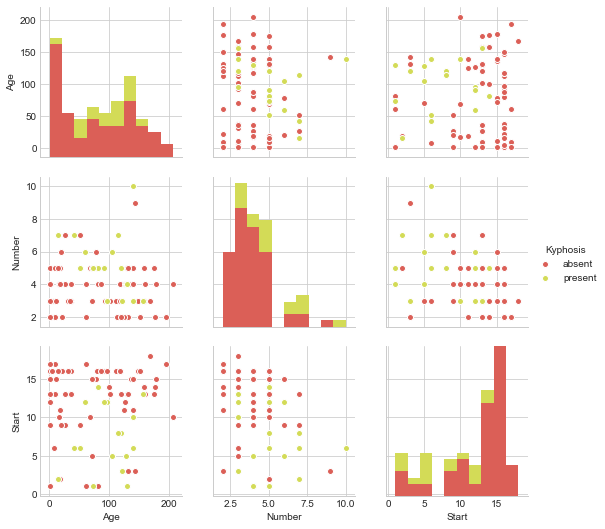

In [13]:
sns.pairplot(df, hue='Kyphosis')

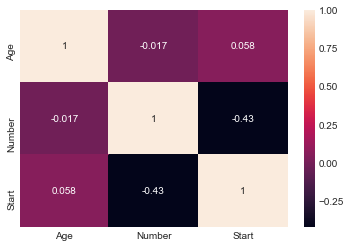

In [15]:
sns.heatmap(df.corr(), annot=True)

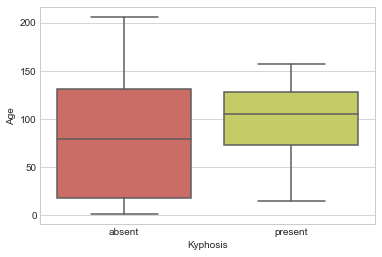

In [16]:
sns.boxplot('Kyphosis', 'Age', data=df)

In [17]:
df['Start'].nunique()

16

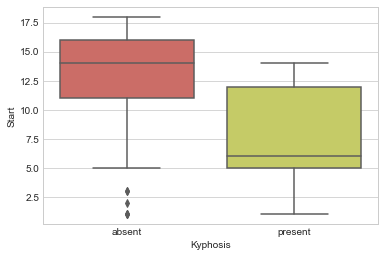

In [18]:
sns.boxplot('Kyphosis', 'Start', data=df)

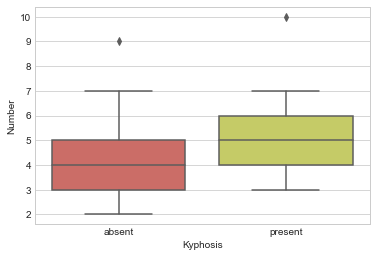

In [19]:
sns.boxplot('Kyphosis', 'Number', data=df)

In [22]:
df['Kyphosis'].value_counts()

absent     64
present    17
Name: Kyphosis, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

In [44]:
X = df.drop('Kyphosis', axis=1)
y = df['Kyphosis'].map({'absent':0, 'present':1})

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=42)

In [65]:
train_mean = X_train.mean()
train_std = X_train.std()
X_train = (X_train - train_mean)/train_std
X_test = (X_test - train_mean)/train_std

In [66]:
y_test.value_counts()

0    15
1     4
Name: Kyphosis, dtype: int64

In [67]:
15/4

3.75

In [68]:
64/17

3.764705882352941

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [70]:
from sklearn.metrics import f1_score, classification_report

In [73]:
models = {'Logistic Regression': LogisticRegression(class_weight='balanced'),
          'KNN': KNeighborsClassifier(n_neighbors=1)}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    predict = model.predict(X_test)
    #print(model_name, f1_score(y_test, predict))
    print(model_name)
    print(classification_report(y_test, predict))
    print("====================\n")

Logistic Regression
             precision    recall  f1-score   support

          0       0.79      0.73      0.76        15
          1       0.20      0.25      0.22         4

avg / total       0.66      0.63      0.65        19


KNN
             precision    recall  f1-score   support

          0       0.93      0.93      0.93        15
          1       0.75      0.75      0.75         4

avg / total       0.89      0.89      0.89        19




In [64]:
models['Logistic Regression'].predict(X_test)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0],
      dtype=int64)